In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W

In [4]:
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Varaibles for plotting cost function
W_val = []
cost_val = []

2022-07-21 09:01:22.506876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-21 09:01:22.512112: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [5]:
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

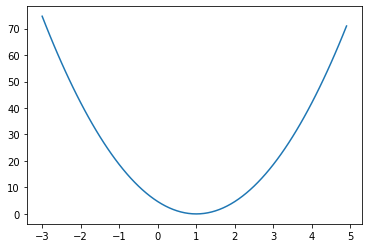

In [6]:
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [7]:
# Gradient Descent

# learning_rate = 0.1
# gradient = tf.reduce_mean((W * X - Y) * X)
# descent = W - learning_rate * gradient
# update = W.assign(descent)  -> (W := W)

## Gradient Descent

In [8]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [9]:
# Our hypothesis for Linear model X * W
hypothesis = X * W

# cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= Learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [10]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 22.26632 [-0.26113093]
1 6.3335285 [0.32739693]
2 1.8015368 [0.6412784]
3 0.51243705 [0.80868185]
4 0.14575978 [0.89796364]
5 0.04146055 [0.9455806]
6 0.011793269 [0.9709763]
7 0.0033545336 [0.9845207]
8 0.0009541801 [0.99174434]
9 0.00027140597 [0.995597]
10 7.720175e-05 [0.9976517]
11 2.195953e-05 [0.9987476]
12 6.2453423e-06 [0.9993321]
13 1.7769937e-06 [0.99964374]
14 5.055043e-07 [0.99981]
15 1.437428e-07 [0.9998987]
16 4.089758e-08 [0.99994594]
17 1.1651423e-08 [0.99997115]
18 3.321773e-09 [0.9999846]
19 9.364562e-10 [0.99999183]
20 2.666134e-10 [0.99999565]


In [25]:
# Minimize: Gradient Descent Magic

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-3.0)
# Linear model
hypothesis = X * W

In [26]:
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [28]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


## Optional: compute_gradient and apply_gradient

In [50]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-3.0)
# Linear model
hypothesis = X * W

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [51]:
# train = optimizer.minimize(cost)

# Get gradients
gvs = optimizer.compute_gradients(cost)

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)